In [1262]:
from nltk.corpus import stopwords
import codecs
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import NMF
import pickle
import matplotlib.patches as mpatches
from sklearn import (
    cluster, datasets, 
    decomposition, ensemble, manifold, 
    random_projection, preprocessing)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def read_it(item):
    f=codecs.open(item ,'r')
    f=f.read()
    f=f.replace("\n", " ")
    sent_tokens = sent_tokenize(f)
    tokens = [sent for sent in map(word_tokenize, sent_tokens)]
    list(enumerate(tokens))
    others = '“,”,’,—'
    stopwords_ = set(stopwords.words('english'))
    tokens_lower = [[word.lower() for word in sent] for sent in tokens]
    punctuation_ = set(string.punctuation)
    clean_token= [[word.replace(str(punctuation_),'') for word in sent] for sent in tokens_lower]

    def filter_tokens(sent):
        return([w for w in sent if not w in stopwords_ and not w in punctuation_ and not w in others])

    tokens_filtered = list(map(filter_tokens, clean_token))



    return tokens_filtered

In [1286]:
def chunk(x, y = 100):
    l=len(x)
    v=l//y
    remainder=y
    all_series = []
    for loops in range(v+1):
        new_elem = []
        if loops > (v - 1):
            remainder = l%y
        if remainder > 0:
            for i in range(remainder):
                temp = (y * (loops)) + i
                new_elem.extend(x[temp])
            all_series.append(new_elem)
    return np.array(all_series,dtype=object)

In [ ]:
def squeaky_clean(new_df):
    others = '“,”,’,—,_,.,——,--'
    vals = list(new_df['txt'].values)
    arr=[]

    for _sent in vals:
        sent=[]
        for word in _sent:
            for char in others:
                word = word.replace(char,'')
            sent.append(word)      
        arr.append(sent)
    return pd.Series(arr)

In [1300]:
def make_it_df(item,title,author):
    df = pd.DataFrame()
    df['txt']= squeaky_clean(chunk(read_it(item)))
    df['title']= title
    df['author'] = author
    return df

In [1287]:
#Ernest Hemingway
bell = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/WBT.txt",'For Whom the Bell Tolls','Ernest Hemingway')
fta = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/FTA.txt", "A Farewell to Arms", "Ernest Hemingway")
oms = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/oms.txt", "The Old Man and the Sea", "Ernest Hemingway")

#Fyodor Dostoevsky
kar = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/karmaz.txt", "The Brothers Karmazov", "Fyodor Dostoevsky")
cp = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/CP.txt", "Crime and Punishment", "Fyodor Dostoevsky")
dem = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/demons.txt", "Demons", "Fyodor Dostoevsky")

#F. Scott Fitzgerald
#gg = make_it_df("/Users/andrewargaez/Author_Classifier/GG.txt", "The Great Gatsby", "F. Scott Fitzgerald")
#sop = make_it_df("/Users/andrewargaez/Author_Classifier/sop.txt", "This Side of Paradise", "F. Scott Fitzgerald")

# Jane Austen
pp = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/PP.txt", "Pride and Prejudice", "Jane Austen")
em = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/emma.txt", "Emma", "Jane Austen")
ss = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/ss.txt", "Sense and Sensibility", "Jane Austen")

# Lewis Carrol
al= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/alice.txt", "Alice in Woderland", "Lewis Carrol")
tlg= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/tlg.txt", "Through the Looking Glass", "Lewis Carrol")
P= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/P.txt", "Phantasmagoria and Other Poems", "Lewis Carrol")

# drac= make_it_df("/Users/andrewargaez/Author_Classifier/drac.txt", "Dracula", "Bram Stoker")
# lf= make_it_df("/Users/andrewargaez/Author_Classifier/LF.txt", "Lord of the Flies", "William Golding")
# pet = make_it_df("/Users/andrewargaez/Author_Classifier/Peter.txt", "Peter Pan", "J. M. Barrie")
# ti  = make_it_df("/Users/andrewargaez/Author_Classifier/TI.txt", "Treasure Island", "Robert Louis Stevenson")

# Oscar Wilde
pdg = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/pdg.txt", "Picture of Dorian Gray", "Oscar Wilde")
hp = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/behappy.txt", "The Happy Prince and other Tales", "Oscar Wilde")
drp = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/drp.txt", "De Profoundis", "Oscar Wilde")


# Mark Twain
huck = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/huck.txt", "Adventures of Huckleberry Fin", "Mark Twain")
ts = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/ts.txt", "Adventures of Tom Sawyer", "Mark Twain")
pnp = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/pandp.txt", "The Prince and the Pauper", "Mark Twain")

# H. G. Wells
wow = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/wow.txt", "The War of the Worlds", "H. G. Wells")
im = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/IM.txt", "The Invisible Man", "H. G. Wells")
idm = make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/idm.txt", "The Island of Doctor Moreau", "H. G. Wells")

# Leo Tolstoy
wp= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/WP.txt", "War and Peace", "Leo Tolstoy")
ak= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/AK.txt", "Anna Kerenina", "Leo Tolstoy")
mlb= make_it_df("/Users/andrewargaez/Author_Classifier/txt_files/MLB.txt", "What Men Live By and Other Stories", "Leo Tolstoy")


In [1294]:
train =pd.concat([fta,oms,dem,cp,ss,em,P,tlg,drp,hp,pnp,ts,wow,im, wp,ak],ignore_index=True)
test= pd.concat([bell,kar,pp,al,pdg,huck,idm,ak],ignore_index=True)

In [ ]:
#[bell,oms,kar,cp,pp,em,al,tlg,pdg,hp,huck,ts,wow,idm, wp,ak]
#[fta,dem,ss,P,drp,pnp,im,wp]
#[bell,kar,pp,al,pdg,huck,idm,ak]

In [ ]:
def get_data(item):
    data=[]
    for row in item.txt:
        data.append(' '.join(row))
    labels = item.author
    le = LabelEncoder()
    y = le.fit_transform(labels)
    seen = []
    genre_label_map = {}
    for label, _y in list(zip(labels, y)):
        if label not in seen:
            genre_label_map[str(_y)] = label
            seen.append(label)
    return data, y

In [ ]:
def vectorizer(data):
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(data).toarray()
    return X, tfidf

In [ ]:
def scorer(df,df2,model):
    data,y = get_data(df)
    data_train, data_test, y_train, y_test = train_test_split(data, y)
    X_train, tf = vectorizer(data_train)
    X_test=tf.transform(data_test)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    seen = f1_score(y_test, y_hat,average='micro')

    test_data, test_y =get_data(df2)
    test_tfidf = tf.transform(test_data)
    test_hat= model.predict(test_tfidf)
    unseen = f1_score(test_y, test_hat, average='micro')

    importances = model.feature_importances_
    return seen, unseen

In [1297]:
scorer(train, test, RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=40, random_state=1))

(0.9402985074626865, 0.7020958083832335)

In [ ]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                            random_forest_grid,
                            n_jobs=-1,
                            verbose=True,
                            scoring='f1_micro')
rf_gridsearch.fit(X_train, y_train)

print ("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 1}


In [ ]:
best_rf_model

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=40, random_state=1)

In [ ]:
def vectorizer1(data):
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(data).toarray()
    return X, np.array(tfidf.get_feature_names())

In [1198]:
data, y, label_map = get_data(train)

vect, vocabulary= vectorizer1(data)

In [1156]:
nmf = NMF(n_components=14, max_iter=100, random_state=12345, alpha=0.0)
W = nmf.fit_transform(vect)
H = nmf.components_

/Users/andrewargaez/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [1157]:
for idx, row in enumerate(H, 1):
    top_twenty = np.argsort(row)[::-1][:30]
    print(f"Topic {idx}:")
    print(f"    {', '.join(vocabulary[top_twenty])}")

Topic 1:
    alyosha, ivan, mitya, smerdyakov, grushenka, dmitri, fyodorovitch, father, one, rakitin, pavlovitch, fyodor, to, katerina, ivanovna, though, suddenly, money, know, would, lise, man, cried, come, tell, grigory, love, said, brother, perhaps
Topic 2:
    emma, mr, mrs, harriet, weston, miss, elton, knightley, woodhouse, fairfax, churchill, jane, could, frank, would, hartfield, bates, must, every, much, thing, highbury, think, body, martin, dear, might, one, randalls, never
Topic 3:
    jordan, robert, said, pablo, pilar, thou, thee, agustín, maria, anselmo, thy, gypsy, inglés, bridge, fernando, sordo, one, cave, primitivo, snow, woman, yes, road, man, go, would, good, head, gun, looked
Topic 4:
    rostóv, kutúzov, french, napoleon, army, emperor, denísov, one, men, battle, officer, horse, commander, russian, soldiers, troops, said, enemy, man, general, rode, moscow, officers, road, bagratión, dólokhov, soldier, could, borís, regiment
Topic 5:
    levin, stepan, arkadyevitch,

In [1159]:
ss = preprocessing.StandardScaler()
X_centered = ss.fit_transform(vect)

In [1160]:
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X_centered)

In [1226]:
def plot_mnist_embedding(X, y, title=None):
    """Plot an embedding of the mnist dataset onto a plane.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    X: numpy.array, shape (n, 2)
      A two dimensional array containing the coordinates of the embedding.
      
    y: numpy.array
      The labels of the datapoints.  Should be digits.
      
    title: str
      A title for the plot.
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    idx =np.argmax(X[:,0])

    np.delete(X,idx)
    np.delete(y,(idx-789))
    #ax.axis('off')
    #ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 
                 str(y[i]), 
                 color=plt.cm.tab10(y[i] / 10.), 
                 fontdict={'weight': 'bold', 'size': 12})
    plt.ylim([-.005,.15])            
    plt.xlim([-.02,0.05])
    plt.tight_layout()
    patch_0 = mpatches.Patch(color = plt.cm.tab10(y[y == 0][0] / 10.), label= label_map[str(0)])
    patch_1 = mpatches.Patch(color = plt.cm.tab10(y[y == 1][0] / 10.), label= label_map[str(1)])
    patch_2 = mpatches.Patch(color = plt.cm.tab10(y[y == 2][0] / 10.), label= label_map[str(2)])
    patch_3 = mpatches.Patch(color = plt.cm.tab10(y[y == 3][0] / 10.), label= label_map[str(3)])
    patch_4 = mpatches.Patch(color = plt.cm.tab10(y[y == 4][0] / 10.), label= label_map[str(4)])
    patch_5 = mpatches.Patch(color = plt.cm.tab10(y[y == 5][0] / 10.), label= label_map[str(5)])
    patch_6 = mpatches.Patch(color = plt.cm.tab10(y[y == 6][0] / 10.), label= label_map[str(6)])
    patch_7 = mpatches.Patch(color = plt.cm.tab10(y[y == 7][0] / 10.), label= label_map[str(7)])
    patches = [patch_0, patch_1, patch_2, patch_3, patch_4, patch_5,  patch_6,patch_7]
    label= label_map[str(7)] + str(7)
    plt.legend(handles = patches)
    plt.savefig('figure_of_truth.png')
    plt.show()
    #ax.set_xticks([-.1,.05]), 
    #ax.set_yticks([])
    #ax.set_ylim([-1,1])
    #ax.set_xlim([])

    #if title is not None:
        #ax.set_title(title, fontsize=16)

In [1227]:
pca = decomposition.PCA(n_components=7)
X_pca = pca.fit_transform(X_centered)


plt.subplots(figsize=(20, 20))
plot_mnist_embedding(X_pca, y, label_map)

<ipython-input-1226-b99f15490729>:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


In [1165]:
train_corpus = []
for doc in data:
        train_corpus.append(str(doc))

In [1166]:
tf_idfv = TfidfVectorizer(
    strip_accents=None,
    analyzer='word',
    stop_words='english',
    max_df=1.0,
    min_df=1,
    max_features=500,
    norm='l2')

In [1167]:
count_mat_vec = tf_idfv.fit(train_corpus)

In [1298]:
vocab = count_mat_vec.vocabulary_

500

In [1169]:
feat_names = count_mat_vec.get_feature_names()

In [1170]:
train_sparse = count_mat_vec.transform(train_corpus)

In [1171]:
dense = train_sparse.toarray()

In [1172]:
nmf = NMF(
    n_components=16,
    max_iter=200,
    alpha=0.1,
    l1_ratio=0.0,
    verbose=1,
    shuffle=False
)

In [1173]:
nmf.fit(train_sparse);

/Users/andrewargaez/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


violation: 1.0
violation: 0.3587254824495795
violation: 0.22817657658622864
violation: 0.18755469020085075
violation: 0.1217758288891903
violation: 0.08523506882065168
violation: 0.06672745629347454
violation: 0.055077568006093015
violation: 0.04507092722783174
violation: 0.03436314608541158
violation: 0.027021870980473626
violation: 0.021829108419901957
violation: 0.017874787746428266
violation: 0.014901111151653823
violation: 0.012605444130816504
violation: 0.010810030688449254
violation: 0.009392705801578926
violation: 0.008263825198260797
violation: 0.007347489895359034
violation: 0.006591385587716899
violation: 0.005963992890436969
violation: 0.005429766113909341
violation: 0.004967969313312614
violation: 0.00456523588566239
violation: 0.0042094901189649635
violation: 0.003891998252051149
violation: 0.0036058969759690143
violation: 0.003346315386608624
violation: 0.0031095738917411315
violation: 0.0028930571981493755
violation: 0.0026939225055233533
violation: 0.002510157696777221

In [1237]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 8, figsize=(20, 13), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_[:16]):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.tight_layout()
    plt.savefig('Latent.png')
    plt.show()

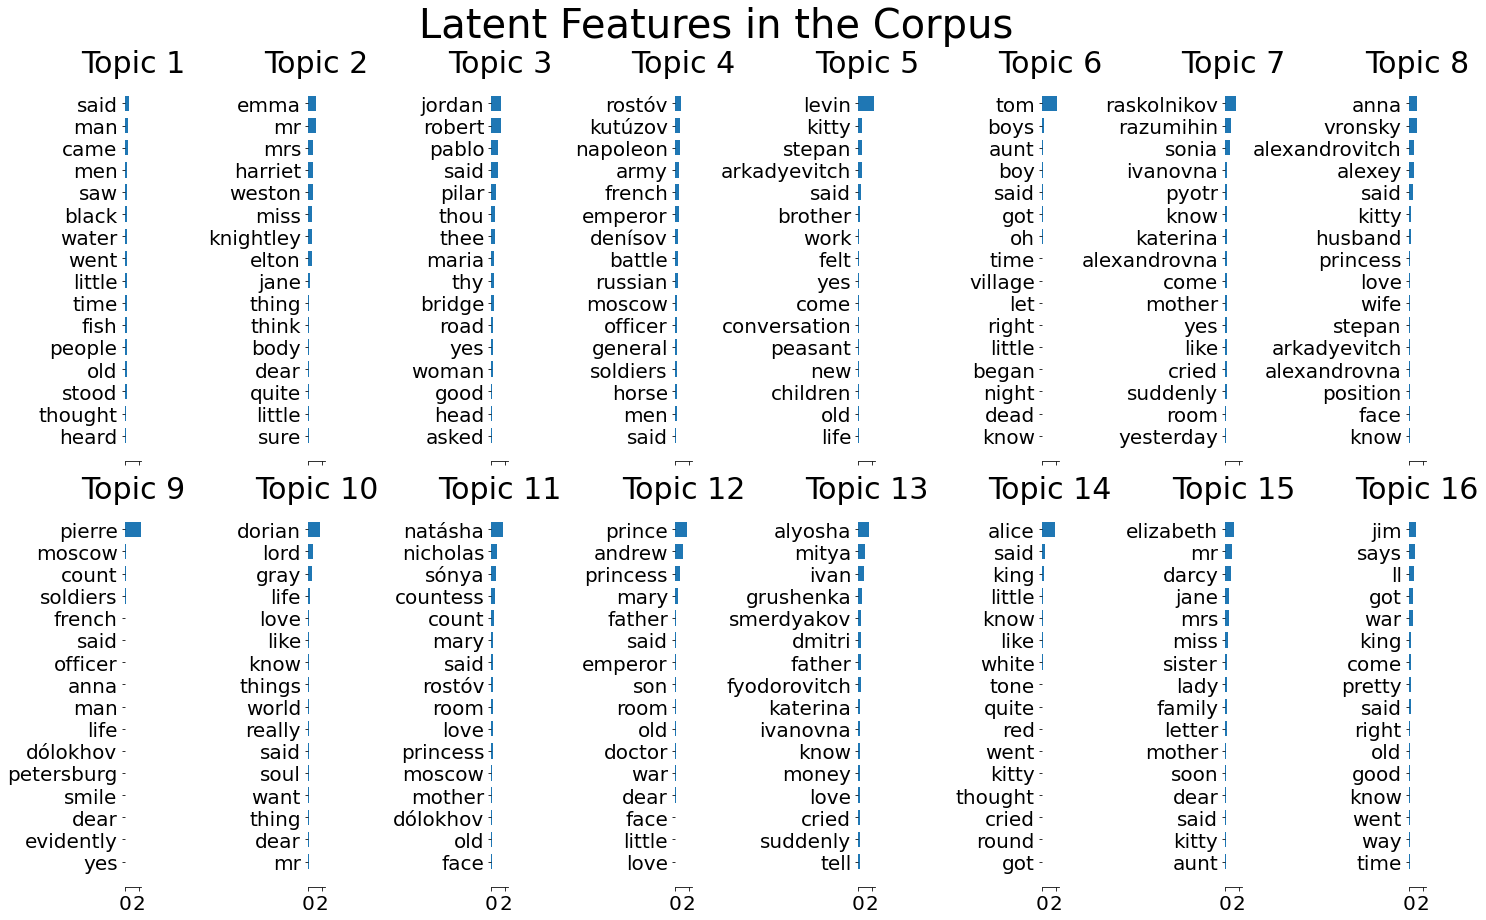

In [1238]:
plot_top_words(nmf, feat_names, 16, 'Latent Features in the Corpus')